# ML Model with Tensorflow and Iris Dataset from scikit-learn

This experiment will build an ML model to determine the types of iris (Setosa, Versicolour, and Virginica) based on sepal length, sepal width, petal length and petal width. The model is a linear regression model. This model was built using TensorFlow by utilizing a dataset from [scikit-learn](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

## Import Libraries

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

## Data Preparation


### Load data

In [2]:
iris_data = load_iris()
print(iris_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


### View Data

In [3]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(iris_data['feature_names'])
print(iris_data['data'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [5]:
print(iris_data['target'])
print(iris_data['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


## Data Exploration





---

**NOTE**

In this experiment, the dataset can be used directly to build a Machine Learning model using Tensorflow. The next section, namely **Data Exploration**, contains information exploration on the Iris Dataset. This section is not related to model building. Model building can be done directly in **Build Machine Learning Model**.

---



This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

Source: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

#### Make DataFrame from Data and Target

In [6]:
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])

In [7]:
iris_df['Iris type'] = iris_data['target']

In [8]:
iris_df['Iris type name'] = iris_df['Iris type'].apply(lambda i: iris_data['target_names'][i])

### Explore Data

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Iris type name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris type          150 non-null    int64  
 5   Iris type name     150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
iris_df.groupby(['Iris type name']).describe()

sepal length (cm)                                              \
                           count   mean       std  min    25%  50%  75%  max   
Iris type name                                                                 
setosa                      50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor                  50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

               sepal width (cm)         ... petal width (cm)      Iris type  \
                          count   mean  ...              75%  max     count   
Iris type name                          ...                                   
setosa                     50.0  3.428  ...              0.3  0.6      50.0   
versicolor                 50.0  2.770  ...              1.5  1.8      50.0   
virginica                  50.0  2.974  ...              2.3  2.5      50.0   

                                                   
               mean  std  min  25%  50%  75%  max  
Iris type name                                     
setosa          0.0  0.0  0.0  0.0  0.0  0.0  0.0  
versicolor      1.0  0.0  1.0  1.0  1.0  1.0  1.0  
virginica       2.0  0.0  2.0  2.0  2.0  2.0  2.0  

[3 rows x 40 columns]

In [13]:
# Correlation between targets
iris_df.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Visualize Data

In the previous section, there was data containing the correlation between targets. This table will be visualized in Heatmap form.

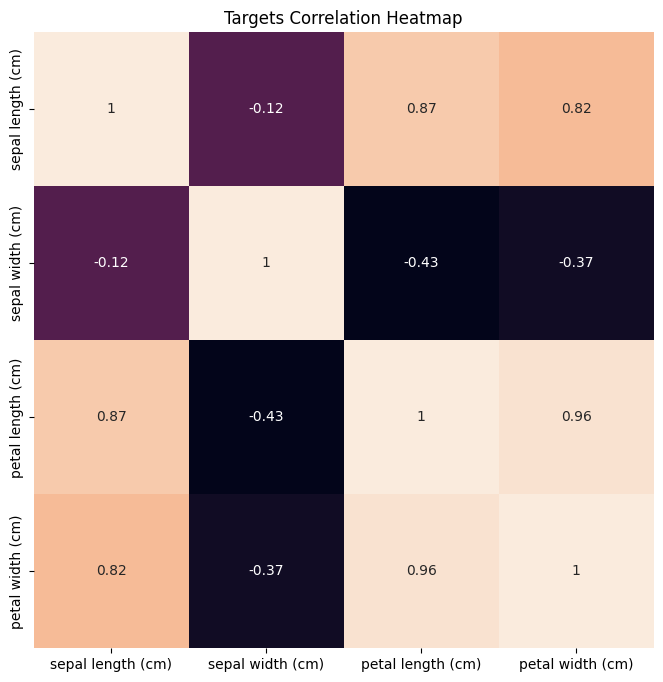

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(iris_df.iloc[:,:4].corr(), annot = True, cbar=False)
plt.title('Targets Correlation Heatmap');

## Build Machine Learning Model

### Split Iris Data to Train, Test, and Validation


**Definitions of Train, Validation, and Test Datasets**

Source: https://machinelearningmastery.com/difference-test-validation-datasets/

*   Training Dataset: The sample of data used to fit the model.
*   Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
*   Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on  the training dataset.


In this experiment, the iris data will be split into train/test/validation with a composition of 75%/15%/10%.

In [26]:
x = iris_data["data"]
y = iris_data["target"]
# Encode target labels with value between 0 and n_classes-1.
y = tf.keras.utils.to_categorical(y, 3)

In [27]:
x_train, x_test_validation, y_train, y_test_validation = train_test_split(
    x, y, test_size = 0.25, random_state = 1
    )

In [28]:
x_test, x_validation, y_test, y_validation = train_test_split(
    x_test_validation, y_test_validation, test_size = 0.4, random_state = 1
    )

In [29]:
# Shape Data After Split Data
print("-- Shape --")
print("x")
print("- x_train:", x_train.shape)
print("- x_test:", x_test.shape)
print("- x_validation:", x_validation.shape)
print("y")
print("- y_train:", y_train.shape)
print("- y_test:", y_test.shape)
print("- y_validation:", y_validation.shape)

-- Shape --
x
- x_train: (112, 4)
- x_test: (22, 4)
- x_validation: (16, 4)
y
- y_train: (112, 3)
- y_test: (22, 3)
- y_validation: (16, 3)


In [30]:
# Data Input and Target Values
print("-- Example of Data --")
print("x")
print("- x_train:", x_train[0:5])
print("- x_test:", x_test[0:5])
print("- x_validation:", x_validation[0:5])
print("y") # target values after transform
print("- y_train:", y_train[0:5])
print("- y_test:", y_test[0:5])
print("- y_validation:", y_validation[0:5])

-- Example of Data --
x
- x_train: [[6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]]
- x_test: [[7.9 3.8 6.4 2. ]
 [6.  2.9 4.5 1.5]
 [5.6 2.7 4.2 1.3]
 [6.4 2.8 5.6 2.1]
 [5.  3.5 1.3 0.3]]
- x_validation: [[6.6 3.  4.4 1.4]
 [6.3 2.5 5.  1.9]
 [5.4 3.9 1.3 0.4]
 [6.7 3.  5.  1.7]
 [5.7 2.8 4.1 1.3]]
y
- y_train: [[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
- y_test: [[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
- y_validation: [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Define Model

In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

### Compile The Model

In [97]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

### Train The Model

In [98]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_validation, y_validation))

Epoch 1/100
4/4 [==============================] - 1s 74ms/step - loss: 1.1339 - accuracy: 0.3036 - val_loss: 1.0969 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1097 - accuracy: 0.3304 - val_loss: 1.0794 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0950 - accuracy: 0.3571 - val_loss: 1.0736 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 1.0844 - accuracy: 0.4107 - val_loss: 1.0680 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 1.0766 - accuracy: 0.4554 - val_loss: 1.0640 - val_accuracy: 0.3750
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 1.0694 - accuracy: 0.4821 - val_loss: 1.0606 - val_accuracy: 0.4375
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0630 - accuracy: 0.5089 - val_loss: 1.0576 - val_accuracy: 0.3750
Epoch 8/100
4/4 [===

##### Visualize Model Accuracy and Loss

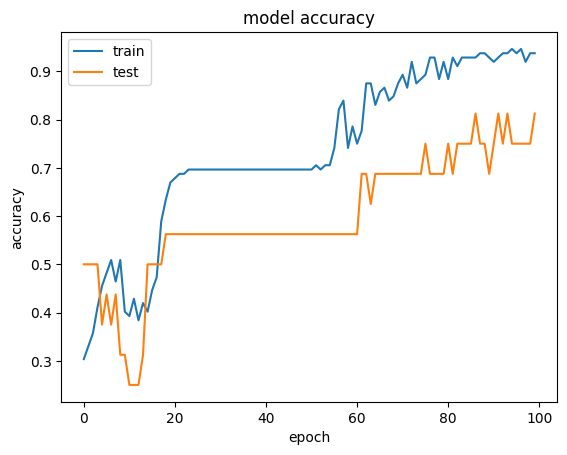

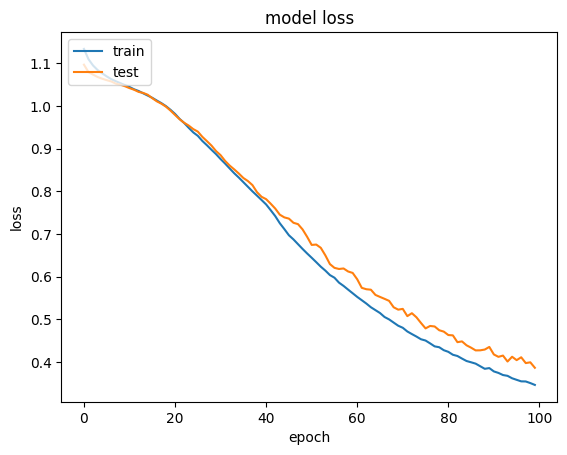

In [99]:
# list all data in history
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate The Model with Test Data

In [100]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3600209355354309
Test accuracy: 0.9545454382896423


### Predict Test Data

In [80]:
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 73ms/step


array([[1.0261408e-03, 3.7494582e-01, 6.2402803e-01],
       [9.3806824e-03, 5.8438832e-01, 4.0623105e-01],
       [1.3142524e-02, 6.1979997e-01, 3.6705753e-01],
       [1.0287027e-03, 1.9360502e-01, 8.0536628e-01],
       [9.9281138e-01, 6.2557631e-03, 9.3284360e-04],
       [1.7281907e-02, 7.1371871e-01, 2.6899934e-01],
       [9.7367773e-03, 5.5663872e-01, 4.3362454e-01],
       [9.8680842e-01, 1.1659896e-02, 1.5316036e-03],
       [3.0933185e-03, 3.8397327e-01, 6.1293346e-01],
       [1.1412759e-02, 6.9494009e-01, 2.9364711e-01],
       [9.8773330e-01, 1.0717454e-02, 1.5493677e-03],
       [1.2394760e-02, 5.9605366e-01, 3.9155158e-01],
       [1.0596798e-01, 7.1446520e-01, 1.7956679e-01],
       [1.5628112e-02, 7.1116757e-01, 2.7320427e-01],
       [9.9754792e-01, 2.1747521e-03, 2.7725601e-04],
       [9.8748595e-01, 1.0726114e-02, 1.7879892e-03],
       [9.4934553e-03, 6.1640978e-01, 3.7409672e-01],
       [9.9348372e-01, 5.7400684e-03, 7.7625277e-04],
       [1.2514858e-03, 2.436

In [81]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [2 1 1 2 0 1 1 0 2 1 0 1 1 1 0 0 1 0 2 0 2 0]
Predicted: [2 1 1 2 0 1 1 0 2 1 0 1 1 1 0 0 1 0 2 0 2 0]
